Exercise 4 - Duality
===
> Swiss Joint Master of Science in Computer Science - Applied Optimization

> Vincent Carrel, Jonas Fontana, Alain Schaller


In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
from matplotlib import patheffects

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Lagrange Duality (3 pts)
Consider the optimization problem

\begin{align}
\text{minimize } \quad & x^2 + 1 \\
\text{subject to } \quad & (x-2)(x-4) \le 0
\end{align}

with variable $x \in \mathbb{R}$.


**(a)** Analysis of primal problem: give the feasible set, the optimal value, and the optimal
solution.

**(b)** Lagrangian and dual function: plot the objective $x^2 + 1$ versus $x$. On the same plot,
show the feasible set, optimal point and value,
and plot the Lagrangian $L(x,\lambda)$ versus $x$ for a few positive values of $\lambda$.
Verify the lower bound property $(p^* \ge inf_xL(x,\lambda)$ for $\lambda \ge 0$). Compute and
sketch the Lagrange dual function $g$.


**(c)** Lagrange dual problem: state the dual problem, and verify that it is a concave maximization problem.
Find the dual optimal value and dual optimal solution $\lambda$. Does strong duality hold?




## (a)

The feasible set is $[2,4]$

The optimal solution is $x = 2$

The optimal value is $y = 5$

## (b)

**Lagrangian and dual function: plot the objective $x^2 + 1$. On the same plot, show the feasible set, optimal point and value, and plot the Lagrangian $L(x,λ)$ for a few positive values of λ**

The function to optimize is below the violet one. Play with the lambda value to make it visible again.


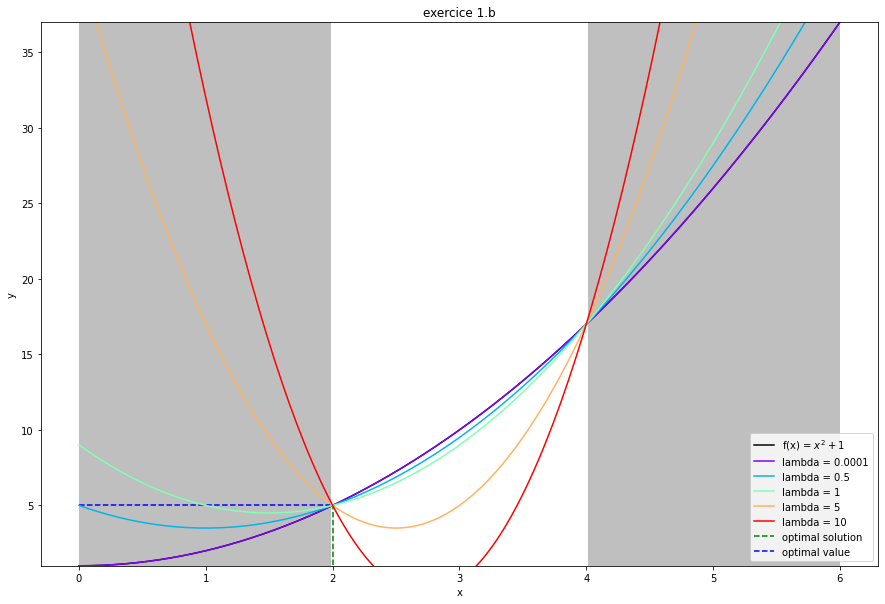

In [6]:
f = lambda x: x**2 + 1
lagrangian = lambda x,l: x**2 + 1 + l*(x**2 - 6*x + 8)

plt.figure(figsize=(15, 10))

x = np.linspace(0, 6, 200) 
y = f(x)

#Plot function to minimize
plt.plot(x, y, color='black',label="f(x) = $x^2 + 1$")

#Add constraints
plt.fill_between(x, y.min(), y.max(), where=x > 4,
                facecolor='grey', alpha=0.5)
plt.fill_between(x, y.min(), y.max(), where=x < 2,
                facecolor='grey', alpha=0.5)

#Add solution and value
plt.vlines(2, 0, f(2), linestyle="dashed",label="optimal solution",colors="green")
plt.hlines(f(2), 0, 2, linestyle="dashed",label="optimal value",colors="blue")

#Add different lagrangian
lambda_value = [0.0001, 0.5,1,5,10]
color = plt.cm.rainbow(np.linspace(0, 1, len(lambda_value)))

for l,c in zip(lambda_value,color):
    plt.plot(x,lagrangian(x,l),color=c,label=f"lambda = {l}")

plt.ylim(y.min(),y.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("exercice 1.b")
plt.legend()

plt.show()

**Verify the lower bound property ($p^∗ ≥ inf_x L(x,λ)$ for λ ≥ 0)**

We can see it graphically. We can play with the lambda value

By calcul:

Be x in our feasible set $[2,4]$, $λ$ set.

Then $λ(x^2 -6x + 8) \leq 0$

$\rightarrow L(x,λ) \leq f(x)$

$\rightarrow inf_x L(x,λ) \leq inf_x f(x)$ 

$\rightarrow inf_x L(x,λ) \leq p^∗$

**Compute and sketch the Lagrange dual function g**

$g(λ) = inf_x  L(x,λ) = inf_x  x^2 + 1 + λ(x^2 -6x + 8)$

$\rightarrow g(λ) = inf_x (1 + λ)x^2 - 6λx + 9λ$

$\frac{\partial L(x,λ)}{\partial x} = 2(1 + λ)x - 6λ = 0$

$ \rightarrow x = \frac{3λ}{(1 + λ)}$

$\rightarrow g(λ) = \frac{-λ^2+9*λ+1}{(λ+1)}$

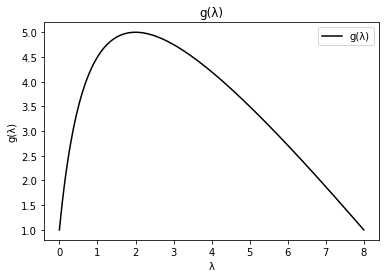

In [10]:
g = lambda l: (1+9*l-l**2)/(1+l)

lambdas = np.linspace(0,8,200)

plt.plot(lambdas,g(lambdas), color='black',label="g(λ)")

plt.xlabel("λ")
plt.ylabel("g(λ)")
plt.title("g(λ)")
plt.legend()

plt.show()

## (c)


**Lagrange dual problem: state the dual problem, and verify that it is a concave maximization problem. Find the dual optimal value and dual optimal solution λ. Does strong duality hold?**

The Lagrange dual problem is basically:

maximize $g(λ) = \frac{-λ^2+9*λ+1}{(λ+1)}$

subject to $λ \geq 0$

We know that it is a maximization problem, because $\frac{p(x)}{q(x)}$ with deg(p) = 2 and deg(q) = 1 has a max. 

It is also concave because $-g(λ) = \frac{p(x)}{q(x)}$ with p(x) convexe (polynome of degree 2) and q(x) affine non-decreasing. So $-g(λ)$ is convexe, therefore $g(λ)$ is concave

In [14]:
solution_l = optimize.fmin(lambda x: -g(x),1)[0]

print("the dual optimal value is ", g(solution_l), " for the dual optimal solution lambda = ", solution_l)

Optimization terminated successfully.
         Current function value: -5.000000
         Iterations: 17
         Function evaluations: 34
the dual optimal value is  5.0  for the dual optimal solution lambda =  2.000000000000002


The strong duality hold:

we see that $p* = 5 = d*$

As well as $f(x^*) = f(2) = 5 = g(2) = g(λ^*)$ 

\pagebreak

# KKT Condition (2 pts)
Consider the following optimization problem:

\begin{align}
\text{minimize } \quad & x_1^2 - 2x_2^2 \\
\text{subject to } \quad & (x_1+4)^2 - 2 \le x_2 \\
                         & x_1 - x_2 + 4 = 0 \\
                         & x_1 \ge -10
\end{align}

**(1)** sketch the problem and graphically determine the primal solution $x^*$.

**(2)** verify your $x^*$ by determining suitable $\lambda^*$ and $v^*$ such that the KKT conditions are
satisfied for $(x^*,\lambda^*,v^*)$.




## (1) Sketch the problem and determine $x^*$

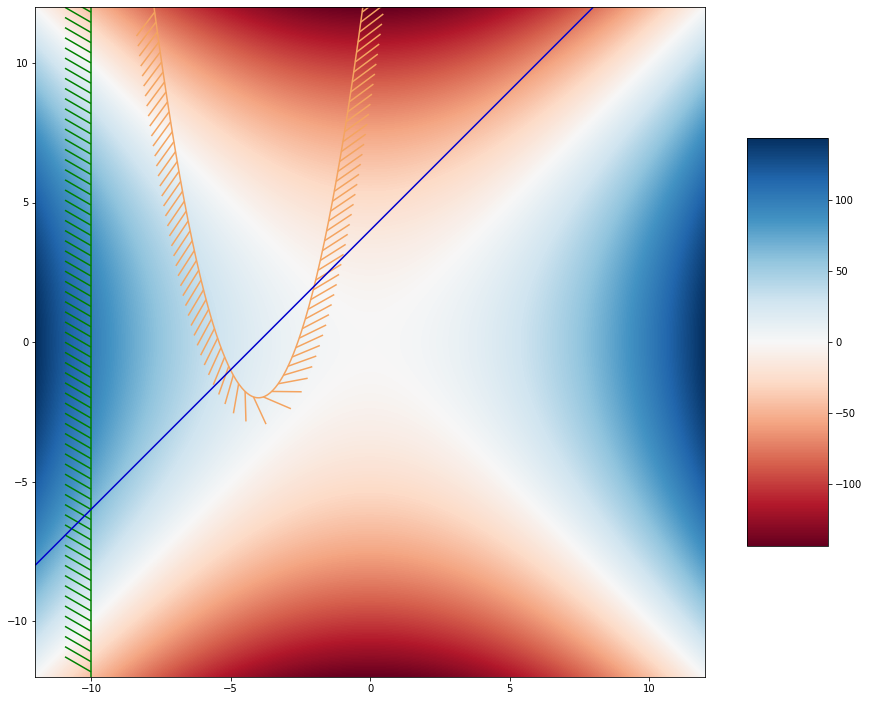

In [17]:

fig, ax = plt.subplots(figsize=(15, 15))

x = np.linspace(-12.0, 12.0, 500)
y = np.linspace(-12.0, 12.0, 500)

X, Y = np.meshgrid(x, y)

# Objective function
obj = X**2 - Y**2

#Constraint 1: (x+4)^2 - 2 <= y
g1 = (X + 4)**2 - 2 - Y

#Constraint 2: x >= -10
g2 = -X - 10

#Constraint 3: x - y + 4 = 0
g3 = X - Y + 4

#Plot the function to optimize, we want the min so a Red value
im = plt.imshow(obj,cmap=plt.cm.RdBu,extent=[-12,12,-12,12],origin="lower")

#Plot constraint 1
cg1 = ax.contour(X, Y, g1, [0], colors='sandybrown')
plt.setp(cg1.collections,
         path_effects=[patheffects.withTickedStroke(angle=135,length=3)])

#plot constraint 2
cg2 = ax.contour(X, Y, g2, 0, colors='green')
plt.setp(cg2.collections,
         path_effects=[patheffects.withTickedStroke(angle=60, length=3)])

#contraint 3, remember we must be on this line as it is an equality constraint
cg3 = ax.contour(X, Y, g3, [0], colors='mediumblue')

fig.colorbar(im, shrink=0.5, aspect=5)

plt.show()

We can see that the solution will be approximately $x^* = (x,y) = (-2,2)$

We must follow the blue line (constraint 3, but we are blocked by constraint 1). We can rapidly calculate it by taking the root of

$(x + 4)^2 - 2 - (x + 4)$, which are -5 and -2. We keep -2 according to the graphic, and compute $x + 4 = y$ for x = -2 $\rightarrow y = 2 \rightarrow x^* = (x,y) = (-2,2)$

## (2) Verify $x^*$ by determining suitable $\lambda^*$ and $v^*$ _st._ KKT conditions are satisfied

We have:

**1) Primal constraints:**

- $(x + 4)^2 - 2 - y \leq 0$

- $-x - 10 \leq 0$

- $x - y + 4 = 0$

**2) Dual constraints:**

- $λ_1 \geq 0$

- $λ_2 \geq 0$

**3) Complementary slackness:**

- $λ_1((x + 4)^2 - 2 - y) = 0$

- $λ_2(-x - 10) = 0$

**4) Vanishing gradient of Lagrangian:**

- $\nabla_xL(x,y,λ_1,λ_2,ν) = \nabla f_0(x,y) + λ_1\nabla f_1(x,y) + λ_2\nabla f_2(x,y) + v\nabla h_1(x,y) = 0$

$\rightarrow \begin{pmatrix} 2x \\ -2y \end{pmatrix} + λ_1 \begin{pmatrix} 2x + 8 \\ -1 \end{pmatrix} + λ_2 \begin{pmatrix} -1 \\ 0 \end{pmatrix} + v \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$



The slackness

- $λ_2(-x - 10) = 0$

tells us that $λ_2 = 0$, because clearly $x \geq -10$, gradient of objective is annihilated by **active** constraint grad

We can then compute $λ_1$ and $v$ 

With (x,y) = (-2,2) the point to explore according to our graphical exploration, we have for the gradient:

- $-4 + 12λ_1 + v = 0$

- $-4 - λ_1 -v = 0$

And we get directly by resolution

- $λ_1 = 8/11$

- $v = -52/11$

**So we have $λ^* = (\frac{8}{11}, 0)$ and $\nu = \frac{-52}{11}$ which respect the KKT conditions for $x^* = (-2,2)$**